In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
# Load the data
filename = 'C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\data_for_all_dvd.csv'
data = pd.read_csv(f"{filename}", index_col=False)

# Analyze how many variants in the transmembrane proteins, are in globular residues.
# Use "is_residue_transmembrane" to filter the non-transmembrane residues, and "protein_contain_transmembrane" to filter the transmembrane proteins.
transmembrane_proteins = data[data['protein_contain_transmembrane'] == 1]
globular_residues = transmembrane_proteins[transmembrane_proteins['is_residue_transmembranal'] == 0]
# print the number of transmembrane proteins
print(f"Number of transmembrane proteins: {len(transmembrane_proteins)}")
# print the number of variants in the transmembrane proteins, that are in globular residues.
print(f"Number of variants in the transmembrane proteins, that are in globular residues: {len(globular_residues)}")


Number of transmembrane proteins: 2067
Number of variants in the transmembrane proteins, that are in globular residues: 1558


In [30]:
# Import the performance metrics data for each model
collagens_df = pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\collagens_proteins\\metrics_collagens_proteins.csv')
globular_df= pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\globular_proteins\\metrics_globular_proteins.csv')
transmembrane_df = pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\transmembrane_residues\\metrics_transmembrane_residues.csv')
all_proteins_df = pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\metrics_all_protein_type_predictors.csv')
gene_specific_pred_df = pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\gene_specific_predictors\\metrics_gene_specific_predictors.csv')

gene_specific_pred_df


,gene,sensitivity,specificity,precision,accuracy,mcc,num_variants,num_benign,num_pathogenic,TP,FP,FN,TN
0,COL2A1,0.912587,0.950376,0.887755,0.939012,0.856308,951,665,286,261,33,25,632
1,COL4A5,0.958231,0.964758,0.979899,0.960568,0.915396,634,227,407,390,8,17,219
2,COL4A3,0.842520,0.943182,0.877049,0.910486,0.794155,391,264,127,107,15,20,249
3,SLC26A4,0.830189,0.729412,0.905350,0.805714,0.520853,350,85,265,220,23,45,62
4,MYO7A,0.742857,0.875000,0.511475,0.855207,0.534420,1402,1192,210,156,149,54,1043
5,FGFR1,0.766917,0.887640,0.718310,0.854806,0.641638,489,356,133,102,40,31,316
6,WFS1,0.860465,0.782609,0.831461,0.825806,0.646350,310,138,172,148,30,24,108


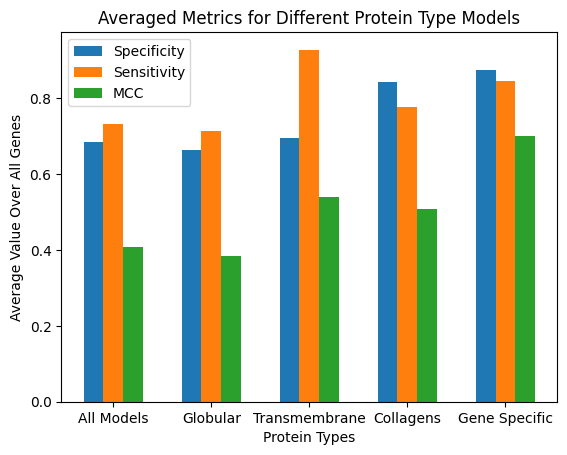

In [34]:
# Filter out genes with mcc equal to 0 or not enough data for each dataset
all_proteins_filtered = all_proteins_df[(all_proteins_df['mcc'] != 0) & 
                                        (all_proteins_df['num_pathogenic'] >= 3) & 
                                        (all_proteins_df['num_benign'] >= 3)]

globular_filtered = globular_df[(globular_df['mcc'] != 0) & 
                                (globular_df['num_pathogenic'] >= 3) & 
                                (globular_df['num_benign'] >= 3)]

transmembrane_filtered = transmembrane_df[(transmembrane_df['mcc'] != 0) & 
                                          (transmembrane_df['num_pathogenic'] >= 3) & 
                                          (transmembrane_df['num_benign'] >= 3)]

collagens_filtered = collagens_df[(collagens_df['mcc'] != 0) & 
                                  (collagens_df['num_pathogenic'] >= 3) & 
                                  (collagens_df['num_benign'] >= 3)]

gene_specific_filtered = gene_specific_pred_df[(gene_specific_pred_df['mcc'] != 0) & 
                                              (gene_specific_pred_df['num_pathogenic'] >= 3) & 
                                              (gene_specific_pred_df['num_benign'] >= 3)]

# Calculate the average metrics for each dataset
avg_specificity_all = all_proteins_filtered['specificity'].mean()
avg_sensitivity_all = all_proteins_filtered['sensitivity'].mean()
avg_mcc_all = all_proteins_filtered['mcc'].mean()

avg_specificity_g = globular_filtered['specificity'].mean()
avg_sensitivity_g = globular_filtered['sensitivity'].mean()
avg_mcc_g = globular_filtered['mcc'].mean()

avg_specificity_t = transmembrane_filtered['specificity'].mean()
avg_sensitivity_t = transmembrane_filtered['sensitivity'].mean()
avg_mcc_t = transmembrane_filtered['mcc'].mean()

avg_specificity_c = collagens_filtered['specificity'].mean()
avg_sensitivity_c = collagens_filtered['sensitivity'].mean()
avg_mcc_c = collagens_filtered['mcc'].mean()

avg_specificity_gene_specific = gene_specific_filtered['specificity'].mean()
avg_sensitivity_gene_specific = gene_specific_filtered['sensitivity'].mean()
avg_mcc_gene_specific = gene_specific_filtered['mcc'].mean()

# Plot the averaged metrics side by side
labels = ['All Models', 'Globular', 'Transmembrane', 'Collagens', 'Gene Specific']
specificity_values = [avg_specificity_all, avg_specificity_g, avg_specificity_t, avg_specificity_c, avg_specificity_gene_specific]
sensitivity_values = [avg_sensitivity_all, avg_sensitivity_g, avg_sensitivity_t, avg_sensitivity_c, avg_sensitivity_gene_specific]
mcc_values = [avg_mcc_all, avg_mcc_g, avg_mcc_t, avg_mcc_c, avg_mcc_gene_specific]

x = range(len(labels))

plt.bar(x, specificity_values, width=0.2, label='Specificity')
plt.bar([i + 0.2 for i in x], sensitivity_values, width=0.2, label='Sensitivity')
plt.bar([i + 0.4 for i in x], mcc_values, width=0.2, label='MCC')

plt.xlabel('Protein Types')
plt.ylabel('Average Value Over All Genes')
plt.title('Averaged Metrics for Different Protein Type Models')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()


In [32]:
# Display the number of genes (rows) in each type after the filter
print("Number of genes in each type after filtering:")
print("All Proteins:", len(all_proteins_filtered))
print("Globular Proteins:", len(globular_filtered))
print("Transmembrane Proteins:", len(transmembrane_filtered))
print("Collagens:", len(collagens_filtered))

Number of genes in each type after filtering:
All Proteins: 61
Globular Proteins: 51
Transmembrane Proteins: 3
Collagens: 7


In [33]:
# Display the number of genes (rows) in each type before the filter
print("Number of genes in each type before filtering:")
print("All Proteins:", len(all_proteins_df))
print("Globular Proteins:", len(globular_df))
print("Transmembrane:", len(transmembrane_df))
print("Collagens:", len(collagens_df))

Number of genes in each type before filtering:
All Proteins: 170
Globular Proteins: 123
Transmembrane: 37
Collagens: 19
